2025-11-10 02:51:36.358888: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-10 02:51:36.802454: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-10 02:51:38.742583: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-10 02:51:42.826493: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10


2025-11-10 02:51:43.005440: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 169344000 exceeds 10% of free system memory.


844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9503 - loss: 0.1637 - val_accuracy: 0.9840 - val_loss: 0.0554
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9853 - loss: 0.0485 - val_accuracy: 0.9893 - val_loss: 0.0361
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9896 - loss: 0.0327 - val_accuracy: 0.9892 - val_loss: 0.0358
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 0.9853 - val_loss: 0.0493
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9941 - loss: 0.0187 - val_accuracy: 0.9917 - val_loss: 0.0338
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9955 - loss: 0.0140 - val_accuracy: 0.9913 - val_loss: 0.0320
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9959 - loss: 0.0122 - val_accuracy: 0.9885 - val_loss: 0.0514
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9973 - loss: 0.0083 - val_accurac

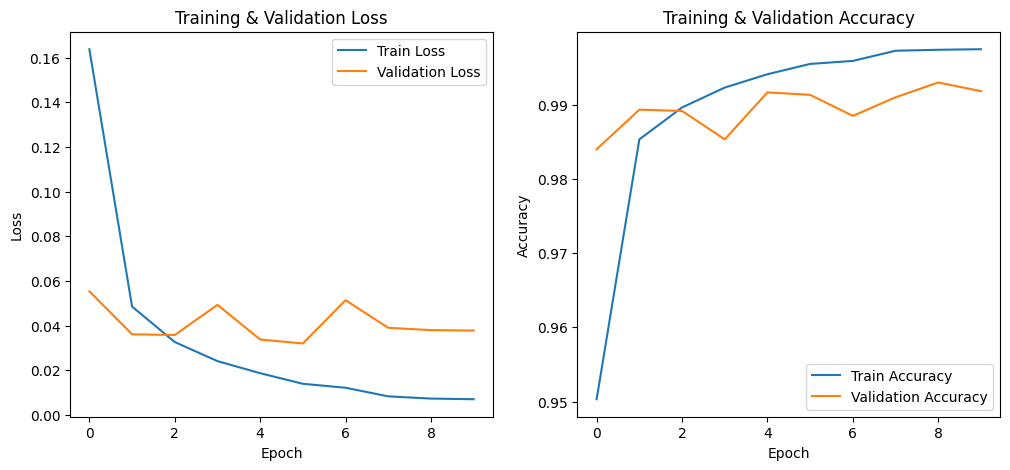

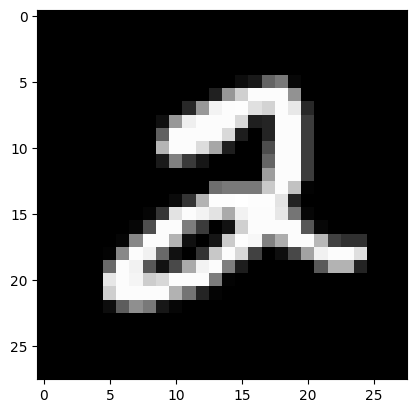

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

train_path = "/home/ayush/Desktop/lp4/dataset/mnist_train.csv"
test_path  = "/home/ayush/Desktop/lp4/dataset/mnist_test.csv"

# Load CSV files
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Split labels and pixels
y_train = train_df.iloc[:, 0].values
x_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape for CNN: (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)


model = models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)



test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)


plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()




img = x_train[5].reshape(28, 28)
plt.imshow(img, cmap="gray")
plt.show()


#Implement the Image classification CNN model for classifying hand-written
#MNIST dataset by dividing the model into following 4 stages:
#a. Loading and preprocessing the image data
#b. Defining the model's architecture
#. Training the model
#d. Estimating the model's performance
